In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPClassifier

In [2]:
pure_data = pd.read_csv('sp500_daily.csv', ',')
N = len(pure_data['Date'])

In [250]:
series = pure_data.as_matrix()[:,1:6]
print(series[-1][-2])

2629.570068


In [251]:
def frange(start, stop, step):
     x = start
     while x < stop:
         yield x
         x += step

In [267]:
x = []
y = []
treshold = -0.025
for i in range(0, N-5, 5):
    x.append([])
    for j in range (i,i+5,1):
        x[int(i/5)].extend(series[j])
    if i > 0:
        if (x[int(i/5)][-2]-x[int(i/5)-1][-2])/x[int(i/5)-1][-2] < treshold:
            # 1 если от закрытия текущей недели до закрытия следующей произошло падение в более чем 3,5 процента
            y.append(1)
        else:
            y.append(0)
x = np.delete(x, 3416, 0)
print(np.size(x,0), np.size(y))
trainStart = 2700
trainEnd = 3100
x_train = x[trainStart:trainEnd]
y_train = y[trainStart:trainEnd]
x_test = x[trainEnd:]
y_test = y[trainEnd:]
print(np.size(x_train,0), np.size(x_test,0))
print(y_test)

3416 3416
400 316
[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [253]:
clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
recall = recall_score(y_test, y_predict, average='binary')
precision = precision_score(y_test, y_predict, average='binary')
print(np.size(y_predict), sum(y_predict), sum(y_test))
print(recall, precision) # the percent of crises, which was correctly predicted
print('\n', y_predict)

316 238 23
0.739130434783 0.0714285714286

 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [256]:
print(np.size(y_predict), sum(y_test), '\n')
for w in frange(0, 1, 0.01):
    clf = LogisticRegression(class_weight={0: w, 1: 1-w})
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    res = recall_score(y_test, y_predict, average='binary')
    print('%.2f \t' % round(w, 3), sum(y_predict), '\t %.3f' % round(res, 3))

316 23 

0.00 	 316 	 1.000
0.01 	 287 	 0.957
0.02 	 259 	 0.870


0.03 	 234 	 0.826
0.04 	 190 	 0.652
0.05 	 172 	 0.609
0.06 	 137 	 0.478
0.07 	 127 	 0.478
0.08 	 117 	 0.478
0.09 	 103 	 0.478


0.10 	 95 	 0.478
0.11 	 84 	 0.391
0.12 	 73 	 0.391
0.13 	 62 	 0.391
0.14 	 57 	 0.304
0.15 	 47 	 0.304


0.16 	 43 	 0.261
0.17 	 38 	 0.217
0.18 	 34 	 0.174


0.19 	 30 	 0.130
0.20 	 27 	 0.130
0.21 	 21 	 0.087
0.22 	 20 	 0.087
0.23 	 12 	 0.087


0.24 	 15 	 0.043
0.25 	 13 	 0.043
0.26 	 11 	 0.043
0.27 	 8 	 0.043
0.28 	 6 	 0.000
0.29 	 7 	 0.043


0.30 	 7 	 0.043
0.31 	 6 	 0.000
0.32 	 4 	 0.000
0.33 	 5 	 0.000
0.34 	 4 	 0.000
0.35 	 2 	 0.000
0.36 	 

2 	 0.000
0.37 	 2 	 0.000
0.38 	 3 	 0.000
0.39 	 2 	 0.000
0.40 	 2 	 0.000


0.41 	 2 	 0.000
0.42 	 1 	 0.000
0.43 	 1 	 0.000
0.44 	 1 	 0.000
0.45 	 1 	 0.000
0.46 	 1 	 0.000
0.47 	 1 	 0.000
0.48 	 1 	 0.000


0.49 	 1 	 0.000
0.50 	 1 	 0.000
0.51 	 1 	 0.000
0.52 	 1 	 0.000
0.53 	 1 	 0.000
0.54 	 0 	 0.000
0.55 	 0 	 0.000
0.56 	 1 	 0.000
0.57 	 0 	 0.000


0.58 	 0 	 0.000
0.59 	 0 	 0.000
0.60 	 0 	 0.000
0.61 	 0 	 0.000
0.62 	 0 	 0.000
0.63 	 0 	 0.000
0.64 	 0 	 0.000
0.65 	 0 	 0.000


0.66 	 0 	 0.000
0.67 	 0 	 0.000
0.68 	 0 	 0.000
0.69 	 0 	 0.000
0.70 	 0 

	 0.000
0.71 	 0 	 0.000
0.72 	 0 	 0.000
0.73 	 0 	 0.000
0.74 	 0 	 0.000
0.75 	 0 	 0.000
0.76 	 0 	 0.000
0.77 	 0 	 0.000
0.78 	 0 	 0.000
0.79 	 0 	 0.000


0.80 	 0 	 0.000
0.81 	 0 	 0.000
0.82 	 0 	 0.000
0.83 	 0 	 0.000
0.84 	 0 	 0.000
0.85 	 0 	 0.000
0.86 	 0 	 0.000
0.87 	 0 	 0.000
0.88 	 0 	 0.000
0.89 	 0 	 0.000
0.90 	 0 	 0.000
0.91 	 0 	 0.000


0.92 	 0 	 0.000
0.93 	 0 	 0.000
0.94 	 0 	 0.000
0.95 	 0 	 0.000
0.96 	 0 	 0.000
0.97 	 0 	 0.000
0.98 	 0 	 0.000
0.99 	 0 	 0.000


In [257]:
clf = LogisticRegression(class_weight={0: 0.1, 1: 0.9})
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
print(y_predict)

[0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0]


In [258]:
clf = SVC()
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
res = recall_score(y_test, y_predict, average='binary')
print(sum(y_predict), sum(y_test))
print(res) # процент верно предсказанных кризисов к общему количеству кризисов

0 23
0.0


In [261]:
X_embedded = TSNE(n_components=2, learning_rate=1000.0).fit_transform(x)
X_embedded.shape

(3416, 2)

(3416, 2) 3416


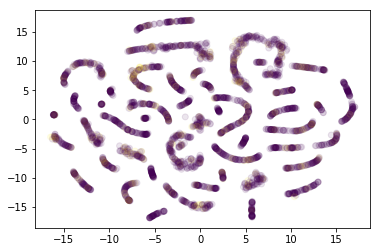

In [261]:
print(X_embedded.shape, np.size(y))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, alpha=0.1)
plt.show()

In [266]:
clf = MLPClassifier(solver='lbfgs', alpha=1, random_state=1, max_iter=1000)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
recall = recall_score(y_test, y_predict, average='binary')
precision = precision_score(y_test, y_predict, average='binary')
print(np.size(y_predict), sum(y_predict), sum(y_test))
print('%.2f \t' % round(recall, 3), '%.2f \t' % round(precision, 3)) # the percent of crises, which was correctly predicted
print(y_predict)

316 21 23
0.13 	 0.14 	
[1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [295]:
clf = RandomForestClassifier(n_estimators=150)
clf.fit(x_train, y_train)
y_predict_1 = clf.predict(x_test)

w=0.135
clf = LogisticRegression(class_weight={0: w, 1: 1-w})
clf.fit(x_train, y_train)
y_predict_2 = clf.predict(x_test)

clf = MLPClassifier(solver='lbfgs', alpha=1, random_state=1, max_iter=1000)
clf.fit(x_train, y_train)
y_predict_3 = clf.predict(x_test)

y_predict = []
for i in range(np.size(y_predict_1)):
    y_predict.append((y_predict_1[i] + y_predict_2[i] + y_predict_3[i])/3.0)
    if y_predict[i] > 0.4:
        y_predict[i] = 1
    else:
        y_predict[i] = 0
        
recall = recall_score(y_test, y_predict, average='binary')
precision = precision_score(y_test, y_predict, average='binary')
print('frequence of crises prediction: %.2f \t' % round(sum(y_predict)/np.size(y_predict),2), sum(y_test))
print('recall %.2f \t' % round(recall, 3), 'precision %.2f \t' % round(precision, 3)) # the percent of crises, which was correctly predicted
print('improve over statistical random: %.2f \t' % round(recall - sum(y_predict)/np.size(y_predict),3))
print(y_predict)

frequence of crises prediction: 0.16 	 23
recall 0.30 	 precision 0.14 	
improve over statistical random: 0.15 	
[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0

In [271]:
y_predict = []
for i in range(np.size(y_predict_1)):
    y_predict.append((y_predict_2[i] + y_predict_3[i])/2.0)
    if y_predict[i] > 0.6:
        y_predict[i] = 1
    else:
        y_predict[i] = 0
        
recall = recall_score(y_test, y_predict, average='binary')
precision = precision_score(y_test, y_predict, average='binary')
print(np.size(y_predict), sum(y_predict), sum(y_test))
print('%.2f \t' % round(recall, 3), '%.2f \t' % round(precision, 3)) # the percent of crises, which was correctly predicted
print(y_predict)

316 9 23
0.13 	 0.33 	
[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
